In [1]:
!pip install -U albumentations
!pip install ttach
!pip install torch-lr-finder

In [2]:
import requests, zipfile, io
import sys, os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision
# Download Data
import requests, zipfile, io
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau

import os
import urllib.request
import zipfile
from random import shuffle
from math import floor
import sys, os

In [5]:
!git clone "https://github.com/vvshankar78/Pytorch_Wrapper.git"
!git clone "https://github.com/jacobgil/pytorch-grad-cam.git"

Cloning into 'Pytorch_Wrapper'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 80 (delta 17), reused 72 (delta 9), pack-reused 0
Unpacking objects: 100% (80/80), done.
Cloning into 'pytorch-grad-cam'...
remote: Enumerating objects: 512, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 512 (delta 19), reused 26 (delta 9), pack-reused 461
Receiving objects: 100% (512/512), 1.86 MiB | 8.37 MiB/s, done.
Resolving deltas: 100% (247/247), done.


In [3]:

my_path = '/content/Pytorch_Wrapper'
sys.path.append(my_path)
from config import ModelConfig
from data.data_download import download_dataset, unzip_data, format_val
from data import data_engine
from data.data_engine import DataEngine

In [4]:
args = ModelConfig()
args.print_config()

Model Parameters:
{ 'batch_size_cpu': 128,
  'batch_size_cuda': 256,
  'dataset': 'Imagenet',
  'dropout': 0,
  'epochs': 15,
  'l1_decay': 0,
  'l2_decay': 0.005,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'seed': 1,
  'target_zip': '/tiny-imagenet-200.zip',
  'train_data_path': '/tiny-imagenet-200/train',
  'train_data_path_engine': '/content/tiny-imagenet-200/train',
  'url': 'http://cs231n.stanford.edu/tiny-imagenet-200.zip',
  'val_data_path': '/tiny-imagenet-200/val',
  'val_data_path_engine': '/content/tiny-imagenet-200/val'}


In [10]:
def data_download_clean(args):
  download_dataset(args)
  unzip_data(args)
  format_val(args)


In [11]:
data_download_clean(args)

Beginning dataset download with urllib2
Dataset downloaded
Extracting zip file: /content/tiny-imagenet-200.zip
Extracted at: /content
Formatting: /content/tiny-imagenet-200/val
Cleaning up: /content/tiny-imagenet-200/val/images
Formatting val done


In [10]:
def get_data():
  # View model config
  args.print_config()
  print(args.epochs)

  data = DataEngine(args)
  train_loader= data.train_loader
  val_loader = data.val_loader
  return data, train_loader, val_loader

data,train_loader, val_loader = get_data()

Model Parameters:
{ 'batch_size_cpu': 128,
  'batch_size_cuda': 256,
  'dataset': 'Imagenet',
  'dropout': 0,
  'epochs': 15,
  'l1_decay': 0,
  'l2_decay': 0.005,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'seed': 1,
  'target_zip': '/tiny-imagenet-200.zip',
  'train_data_path': '/tiny-imagenet-200/train',
  'train_data_path_engine': '/content/tiny-imagenet-200/train',
  'url': 'http://cs231n.stanford.edu/tiny-imagenet-200.zip',
  'val_data_path': '/tiny-imagenet-200/val',
  'val_data_path_engine': '/content/tiny-imagenet-200/val'}
15
generating datasets for Imagenet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


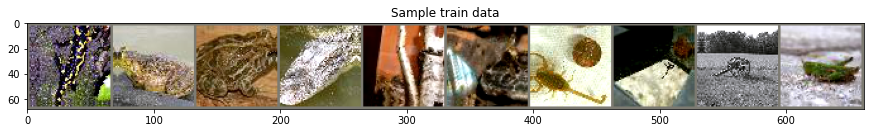

In [6]:
data.show_samples()

In [7]:
img, label = next(iter(train_loader))

In [8]:
label

tensor([167,   6,  56,  59, 113, 193,  37, 183,  44, 142,   3, 117, 156,  26,
        160,  38,  47, 141,  53,  15,  74, 118, 185, 122, 168,  13,  75,  84,
         57,  67, 151,   2, 149,  64, 168, 130, 170, 106, 183,  30, 129,  99,
        182, 181, 199,  96, 107,   6, 189,  64,  28, 117,   0, 186, 179, 144,
        120, 105,  66, 149,  87,  88,  89,  70,  37, 161, 135,  68,  32,  95,
         11,  23,  60,  92, 117, 175,  45,  97, 133, 109,  21,  43,  54, 132,
        155,  18,  96, 183, 186, 161,  84, 115, 191, 136, 190,   0, 134, 130,
        176,  55,  66,   8, 171,  67, 117,  57, 152, 104, 140, 108, 109,  40,
        161,  11, 167, 169,  70, 170,  51,   7,  81,  21, 132, 126, 107, 185,
        119,  94])

In [11]:
img, label = next(iter(val_loader))

In [12]:
label

tensor([184, 117,  65, 175, 145, 183,   7, 162, 145,  40, 144, 111,  65, 165,
         96, 192, 193,  94, 180,  85,  84, 180, 124,   5,  39,  10,  65, 183,
        171,  89,   7,  17,  59, 140,  32, 166,  14,  87, 168,  77,  51,  51,
         62, 112,   1,  90, 140,  83,  26,  65,  38,  61,  55, 178, 135,   6,
         30, 168,  65, 149, 141, 188, 127,   5,  12, 154, 106, 114, 174, 173,
        143, 186, 174,  77, 129,  31, 131,   8,  84,  81, 192, 134, 100, 149,
        187,  68,  69, 176, 162, 104, 117,  18,  58, 187,   4,  95,  76, 146,
         47, 177, 141, 133,  86, 107,  23, 111,  18, 133, 148, 154, 170, 137,
         24, 156,  10, 136, 173,  16, 154, 198,  11, 124, 165,  30, 111,  13,
         76,  98])

In [13]:
img.shape

torch.Size([128, 3, 64, 64])